## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [1]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pathlib

path='/content/drive/MyDrive/Mask_Dataset/'
data_dir = pathlib.Path(path)

### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [4]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

8982


In [5]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['without_mask', 'mask_weared_incorrect', 'with_mask']


[2994, 2994, 2994]


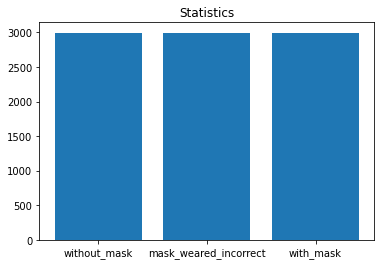

In [6]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

In [7]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Your code

image_all = list(data_dir.glob('*/*.png'))
image_all[:4]
len(image_all)

8982

In [8]:
image_without_mask = list(data_dir.glob('without_mask/*'))
image_mask_weared_incorrect = list(data_dir.glob('mask_weared_incorrect/*'))
image_with_mask = list(data_dir.glob('with_mask/*'))

In [9]:
all_images_dict = {
    'without_mask' : image_without_mask,
    'mask_weared_incorrect' : image_mask_weared_incorrect,
    'with_mask' : image_with_mask,
}
all_images_labels = {
    'without_mask' : 0,    'mask_weared_incorrect' : 1,
    'with_mask' : 2,
}

In [10]:
#Shuffle
import random
random.shuffle(image_all)
image_all[:6]

[PosixPath('/content/drive/MyDrive/Mask_Dataset/without_mask/745.png'),
 PosixPath('/content/drive/MyDrive/Mask_Dataset/mask_weared_incorrect/2612.png'),
 PosixPath('/content/drive/MyDrive/Mask_Dataset/without_mask/1153.png'),
 PosixPath('/content/drive/MyDrive/Mask_Dataset/without_mask/386.png'),
 PosixPath('/content/drive/MyDrive/Mask_Dataset/without_mask/814.png'),
 PosixPath('/content/drive/MyDrive/Mask_Dataset/with_mask/419.png')]

In [12]:
X, y = [], []

for mask_type, images in all_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(128,128))
        X.append(resized_img)
        y.append(all_images_labels[mask_type])

2


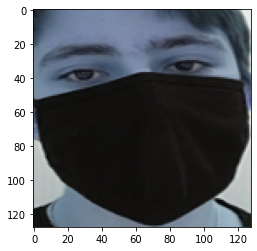

In [20]:
import matplotlib.pyplot as plt

#with_mask
plt.imshow(X[6200])
print(y[6200])

0


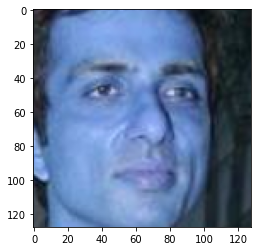

In [16]:
#without_mask
plt.imshow(X[1000])
print(y[1000])


1


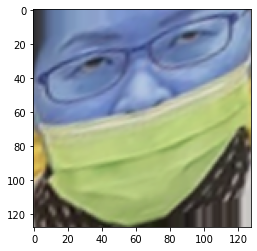

In [21]:
#mask_weared_incorrectly
plt.imshow(X[3000])
print(y[3000])

In [22]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model
shapes = []
for images in image_all:
  temp = cv2.imread(str(images))
  shapes.append(temp.shape)
shapes = np.array(shapes)
# shapes.shape
shape_uniq = np.unique(shapes,axis = 0)
shape_uniq.shape

(1, 3)

In [24]:
# Check if all the images have same shape, else you need to resize them to some common size
# The code provided as it is above in the template will help 

In [25]:
# If the shape is variable, reshape to a common size 
print(shape_uniq.reshape(-1))
# If it is same, prove it

[128 128   3]


In [26]:
print(len(image_without_mask))
print(len(image_with_mask))
print(len(image_mask_weared_incorrect))

X = np.array(X)
y= np.array(y)

2994
2994
2994


In [27]:
#test_&_train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

X_train[0].shape

(128, 128, 3)

In [29]:
# Anything else you want to plot/experiment

### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [30]:
import tensorflow_hub as hub

In [40]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential

In [41]:
# Choose and define base model
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=X_train[0].shape,
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [42]:
# Print base model summary and have a look at the layers
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [43]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)

In [44]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))

In [45]:
# Add the final output layer
#adding final output layer
resnet_model.add(Dense(3, activation='softmax'))

In [46]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 24,638,339
Trainable params: 1,050,627
Non-trainable params: 23,587,712
_________________________________________________________________


In [47]:
# Compile you model (set the parameters like loss/optimizers/metrics)
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

In [49]:
from keras.applications.vgg16 import preprocess_input # Change according to your base model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.2,
)


In [ ]:
# Anything else you wish to try

### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [50]:
# Your code
train_generator = train_datagen.flow(X_train, y_train, batch_size=32,
         subset='training')
validation_generator = train_datagen.flow(X_train, y_train,
         batch_size=8, subset='validation')

### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [51]:
from keras.callbacks import ModelCheckpoint
# ModelCheckpoint is helpful to save the model giving best results (brownie points)

In [52]:
resnet_model.fit(train_generator, validation_data = validation_generator, epochs = 10)

Epoch 1/10
169/169 [==============================] - 46s 184ms/step - loss: 0.2589 - accuracy: 0.9198 - val_loss: 0.1547 - val_accuracy: 0.9384
Epoch 2/10
169/169 [==============================] - 31s 185ms/step - loss: 0.1328 - accuracy: 0.9536 - val_loss: 0.1238 - val_accuracy: 0.9540
Epoch 3/10
169/169 [==============================] - 29s 173ms/step - loss: 0.1133 - accuracy: 0.9597 - val_loss: 0.0895 - val_accuracy: 0.9666
Epoch 4/10
169/169 [==============================] - 29s 174ms/step - loss: 0.0892 - accuracy: 0.9677 - val_loss: 0.0835 - val_accuracy: 0.9688
Epoch 5/10
169/169 [==============================] - 29s 173ms/step - loss: 0.0724 - accuracy: 0.9731 - val_loss: 0.0853 - val_accuracy: 0.9770
Epoch 6/10
169/169 [==============================] - 32s 187ms/step - loss: 0.0772 - accuracy: 0.9742 - val_loss: 0.0743 - val_accuracy: 0.9718
Epoch 7/10
169/169 [==============================] - 29s 173ms/step - loss: 0.0671 - accuracy: 0.9777 - val_loss: 0.0883 - val_ac

### Evaluate the performance

In [ ]:
# Plot training & validation loss/accuracy values

In [53]:
acc = resnet_model.history.history['accuracy']
val_acc = resnet_model.history.history['val_accuracy']
loss = resnet_model.history.history['loss']
val_loss = resnet_model.history.history['val_loss']

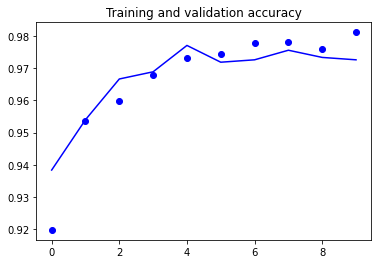

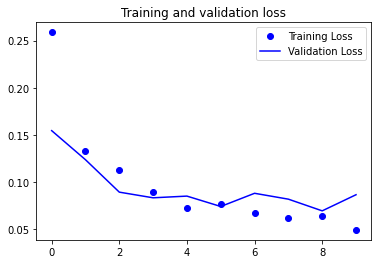

In [54]:
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [55]:
#Classification_Report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
predictions = resnet_model.predict(X_test)
predict_class = []
for predics in predictions:
  m = np.argmax(predics)
  predict_class.append(m)
predict_class = np.array(predict_class)
predict_class
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(predict_class,y_test,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00       743
     class 1       0.99      0.99      0.99       758
     class 2       0.99      0.98      0.99       745

    accuracy                           0.99      2246
   macro avg       0.99      0.99      0.99      2246
weighted avg       0.99      0.99      0.99      2246



In [56]:
print(confusion_matrix(predict_class,y_test))

[[743   0   0]
 [  2 747   9]
 [  4   9 732]]
